In [2]:
#import libraries

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# load in financial data
financial_data = pd.read_csv('financial_data.csv')
print(financial_data.head())

   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000
3      4   920000    612000
4      5   807000    628000


In [4]:
# Store each column in three separate variables called month, revenue, and expenses.
month = financial_data['Month']
revenue = financial_data['Revenue']
expenses = financial_data['Expenses']

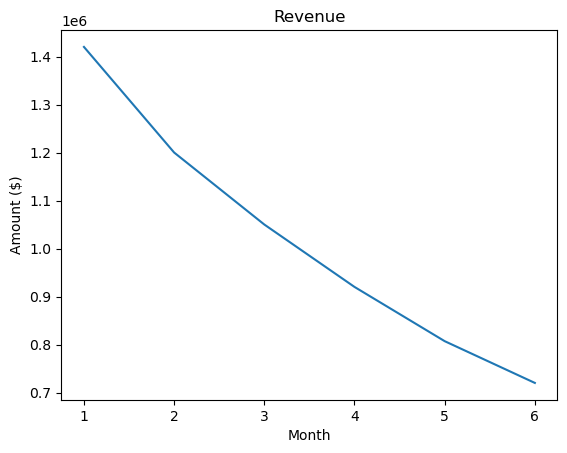

<Figure size 640x480 with 0 Axes>

In [5]:
#create a plot of revenue over the past six months
plt.plot(month,revenue)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue')
plt.show()
plt.clf()

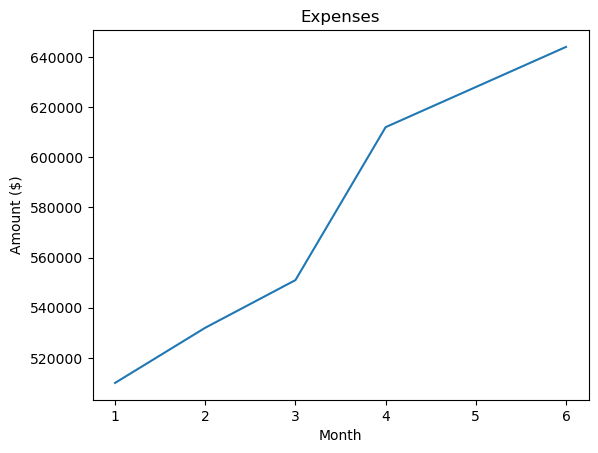

<Figure size 640x480 with 0 Axes>

In [6]:
#create a plot of expenses over the past six months
plt.plot(month,expenses)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Expenses')
plt.show()
plt.clf()

Revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk.

In [7]:
#Load expenses data
expense_overview = pd.read_csv('expenses.csv')
print(expense_overview.head())

       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3    Equipment        0.03
4    Utilities        0.03


In [8]:
#Store columns on 2 variables
expense_categories = expense_overview['Expense']
proportions = expense_overview['Proportion']

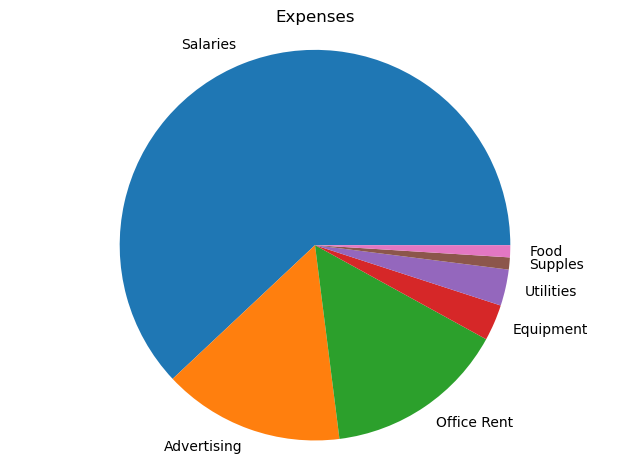

<Figure size 640x480 with 0 Axes>

In [9]:
#pie chart of the different expense categories
plt.pie(proportions, labels = expense_categories)
plt.title('Expenses')
plt.axis('Equal')
plt.tight_layout()
plt.show()
plt.clf()

update the pie chart so that all categories making up less than 5% of the overall expenses (Equipment, Utilities, Supplies, and Food) are collapsed into an “Other” category.

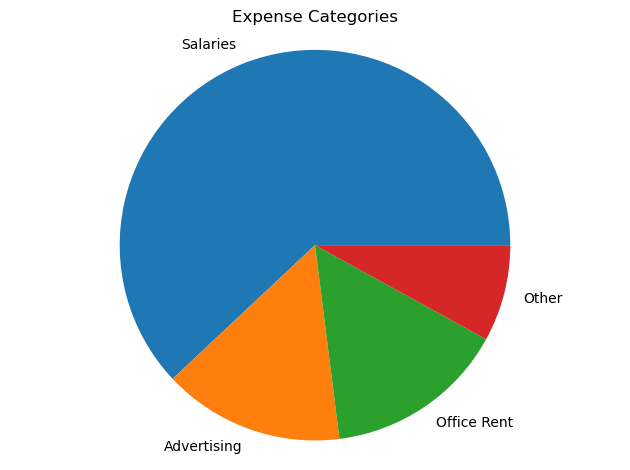

In [10]:
expense_categories = ['Salaries', 'Advertising', 'Office Rent', 'Other']
proportions = [0.62, 0.15, 0.15, 0.08]

#pie chart of the different expense categories
plt.clf()
plt.pie(proportions, labels = expense_categories)
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()

Salaries make up 62% of expenses. The management team determines that to cut costs in a meaningful way, they must let go of some employees.

In [11]:
#Load employees data
employees = pd.read_csv('employees.csv')
print(employees.head())

                Name  Salary  Productivity  Commute Time
0     Mason Pender     87902         29.91         16.79
1          Mia Rew     95672         49.91         44.48
2   Jalisa Kroenke    177864         78.00         19.40
3  Krystal Homeyer    186643         24.36         42.06
4    Kiana Wishart    167148          4.08         25.58


In [12]:
#Sort employees Productivity 
sorted_productivity = employees.sort_values(by=['Productivity'])
print(sorted_productivity)

# Find out 100 employees with less Productivity 
employees_cut = sorted_productivity[:100]
print(employees_cut)

                  Name  Salary  Productivity  Commute Time
259       Wilber Rye    111647          0.06         49.42
92    Fredric Gandee    154469          0.24         22.48
252  Johnson Fordham    168684          1.46         22.39
178    Lilia Lemoine    167579          1.67         27.36
162   Hilma Laughton     85506          1.79         36.41
..                 ...     ...           ...           ...
164      Miki Hartle     50856         99.54         31.39
88        Darell Nau     30530         99.63         44.25
23    Joaquina Neece     95562         99.66         48.65
202    Janae Officer    110139         99.69         15.45
6    Jacinta Dunford    130968         99.98         44.53

[300 rows x 4 columns]
                       Name  Salary  Productivity  Commute Time
259            Wilber Rye    111647          0.06         49.42
92         Fredric Gandee    154469          0.24         22.48
252       Johnson Fordham    168684          1.46         22.39
178         

In [13]:
#check employees commute time
commute_times = employees['Commute Time']
print(
  commute_times.head(),
  commute_times.describe()
)

0    16.79
1    44.48
2    19.40
3    42.06
4    25.58
Name: Commute Time, dtype: float64 count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64


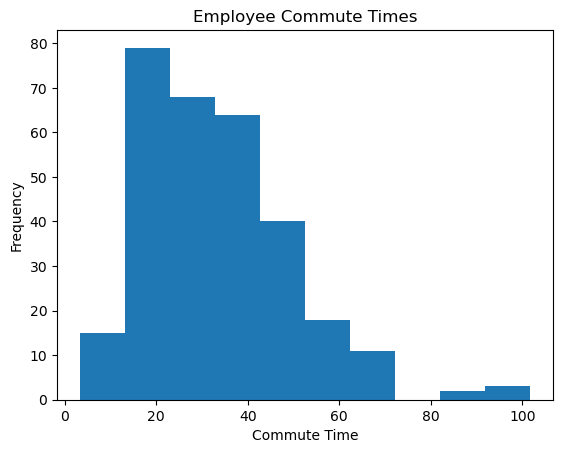

In [14]:
#explore the shape of the commute time data using a histogram
plt.clf()
plt.hist(commute_times)
plt.title("Employee Commute Times")
plt.xlabel("Commute Time")
plt.ylabel("Frequency")
plt.show()

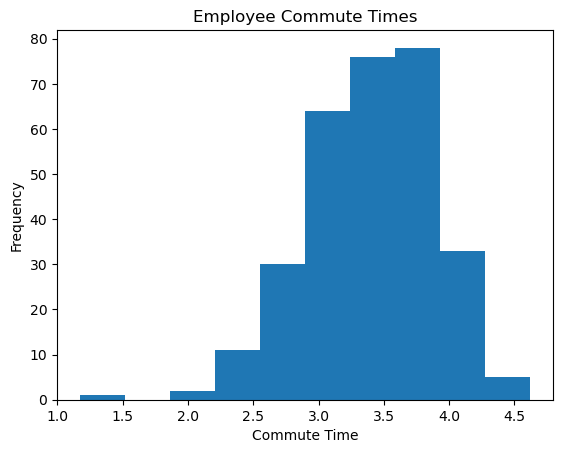

In [15]:
#commute time is right skewed so we transform it
commute_times_log = np.log(commute_times)

#symmetrical commute time data
plt.clf()
plt.hist(commute_times_log)
plt.title("Employee Commute Times")
plt.xlabel("Commute Time")
plt.ylabel("Frequency")
plt.show()

Your colleague Sarah, a data scientist at the company, would like to explore the relationship between Income and Productivity more in depth, but she points out that these two features are on vastly different scales.

For example, productivity is a feature that ranges from 0-100, but income is measured in the thousands of dollars.

Moreover, there are outliers in the data that add an additional layer of complexity

In [16]:
income = employees['Salary']
productivity = employees['Productivity']
scaler = StandardScaler()
standardized_data = scaler.fit_transform(productivity, income)
print(standardized_data)

ValueError: Expected 2D array, got 1D array instead:
array=[2.991e+01 4.991e+01 7.800e+01 2.436e+01 4.080e+00 2.405e+01 9.998e+01
 6.429e+01 5.274e+01 9.425e+01 4.561e+01 7.226e+01 5.601e+01 8.189e+01
 6.072e+01 2.906e+01 1.266e+01 5.136e+01 3.040e+01 8.414e+01 7.569e+01
 9.363e+01 3.893e+01 9.966e+01 5.779e+01 1.202e+01 5.970e+01 9.892e+01
 3.892e+01 9.430e+01 8.150e+00 8.422e+01 2.820e+00 5.321e+01 9.256e+01
 2.791e+01 2.627e+01 1.569e+01 3.893e+01 7.941e+01 8.142e+01 2.983e+01
 4.225e+01 3.452e+01 1.728e+01 8.530e+00 8.610e+01 7.994e+01 4.611e+01
 9.643e+01 4.909e+01 5.760e+01 6.513e+01 3.017e+01 4.472e+01 6.648e+01
 7.894e+01 7.221e+01 7.099e+01 7.022e+01 9.001e+01 7.526e+01 1.218e+01
 7.945e+01 2.951e+01 7.611e+01 6.821e+01 1.168e+01 7.573e+01 5.681e+01
 5.717e+01 1.583e+01 1.104e+01 8.150e+01 8.597e+01 3.889e+01 1.666e+01
 2.751e+01 5.975e+01 2.571e+01 9.166e+01 8.821e+01 8.586e+01 2.189e+01
 4.649e+01 8.311e+01 2.112e+01 5.066e+01 9.963e+01 7.063e+01 5.180e+00
 5.504e+01 2.400e-01 8.836e+01 8.071e+01 9.230e+00 4.963e+01 6.470e+01
 6.919e+01 3.122e+01 9.473e+01 7.889e+01 4.403e+01 5.825e+01 9.541e+01
 7.323e+01 7.869e+01 4.289e+01 4.099e+01 1.486e+01 4.592e+01 1.433e+01
 9.770e+00 7.263e+01 4.082e+01 2.892e+01 2.463e+01 9.288e+01 6.806e+01
 4.439e+01 4.065e+01 4.693e+01 6.280e+01 4.037e+01 4.988e+01 9.546e+01
 7.480e+00 4.809e+01 4.990e+01 3.858e+01 7.405e+01 3.333e+01 5.379e+01
 1.711e+01 7.502e+01 4.021e+01 8.961e+01 4.914e+01 2.224e+01 2.200e+01
 9.376e+01 8.140e+00 6.901e+01 8.880e+00 1.165e+01 6.956e+01 1.183e+01
 1.180e+01 5.753e+01 5.656e+01 2.716e+01 7.377e+01 7.316e+01 6.599e+01
 4.862e+01 1.602e+01 1.950e+01 2.974e+01 4.255e+01 5.480e+00 5.210e+01
 4.612e+01 1.790e+00 3.825e+01 9.954e+01 5.620e+00 8.351e+01 9.483e+01
 3.050e+00 3.945e+01 1.717e+01 7.111e+01 7.180e+01 9.698e+01 1.654e+01
 2.137e+01 3.970e+00 4.065e+01 1.670e+00 5.143e+01 8.024e+01 8.291e+01
 4.233e+01 7.381e+01 6.469e+01 4.242e+01 3.470e+01 5.039e+01 8.160e+01
 1.880e+00 2.566e+01 9.752e+01 4.181e+01 9.287e+01 6.619e+01 9.855e+01
 9.524e+01 2.068e+01 6.081e+01 9.062e+01 4.562e+01 4.871e+01 9.969e+01
 5.989e+01 8.597e+01 1.388e+01 4.905e+01 8.130e+01 7.765e+01 4.446e+01
 8.543e+01 8.337e+01 5.197e+01 8.886e+01 8.035e+01 3.935e+01 1.996e+01
 8.732e+01 3.636e+01 8.955e+01 4.441e+01 2.714e+01 6.023e+01 3.920e+01
 1.835e+01 1.347e+01 9.577e+01 5.110e+00 5.223e+01 6.576e+01 1.231e+01
 8.197e+01 4.956e+01 9.619e+01 1.853e+01 5.601e+01 8.631e+01 9.626e+01
 2.420e+01 4.699e+01 5.339e+01 1.371e+01 3.279e+01 2.911e+01 7.275e+01
 2.759e+01 6.927e+01 8.687e+01 4.559e+01 5.880e+01 5.948e+01 1.930e+00
 1.460e+00 2.356e+01 3.020e+00 5.470e+01 6.074e+01 9.896e+01 4.672e+01
 6.000e-02 1.346e+01 5.426e+01 7.917e+01 3.011e+01 8.292e+01 4.377e+01
 6.809e+01 3.059e+01 9.290e+00 3.579e+01 3.667e+01 4.643e+01 3.188e+01
 5.319e+01 7.579e+01 7.337e+01 4.706e+01 8.220e+00 5.340e+00 8.948e+01
 2.759e+01 3.076e+01 1.520e+01 3.409e+01 7.665e+01 7.587e+01 3.041e+01
 4.908e+01 3.521e+01 8.259e+01 7.265e+01 3.871e+01 2.914e+01 1.957e+01
 5.331e+01 5.261e+01 1.215e+01 8.584e+01 7.627e+01 8.126e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.